In [1]:
#Sebastian Russo
#Artificial Intelligence

#Import necessary libraries
#Library to manipulate and analyze datasets 
import pandas as pd 

#------------------------------------------------------------------------------------------------
#Import logistic regression model using the training set and required metrics
#Library to import only to split datasets into random train and test subsets
from sklearn.model_selection import train_test_split

#Import the logistic regression model
from sklearn.linear_model import LogisticRegression 

#Module contains various functions for evaluating the performance of machine learning models
from sklearn import metrics #Not really necessary but just for explanation

#From the metrics module, import accurracy, f1, precision, recall and classification report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,classification_report
#------------------------------------------------------------------------------------------------
#Imports for Confusion Matrix and other data visualization
#Library to make python matplotlib work like MATLAB
import matplotlib.pyplot as plt  

#Library for confusion matrix visualization
from sklearn.metrics import confusion_matrix  

#Library for data visualization and correlation matrix
import seaborn as sns 

#To import the class in for feature scaling (standardize the range of independent variables)
from sklearn.preprocessing import StandardScaler #COMPLETELY OPTIONAL WE DECIDED TO USE

#To save the trained model
import os
import joblib

In [2]:
#Import data set
df_cancer_dataset= pd.read_csv("breast_cancer_dataset.csv",index_col=0) 
#Nothing else necessary since it is a .csv, has header and "," as delimiters
#index_col=0 will set the column at location 0 "id" as the index for all rows in the dataset

#View shape of dataset (number of rows and columns)
print("Rows and Columns:", end="")
print(df_cancer_dataset.shape)

#Determine the most and least common classification of the dependent column diagnosis
print("Most common diagnosis: ",end="") #B for Benign
print(df_cancer_dataset["diagnosis"].mode()[0]) #or use df_cancer_dataset['diagnosis'].value_counts().idxmax()
print("Least common diagnosis: ",end="") #M for Malignant
print(df_cancer_dataset['diagnosis'].value_counts().idxmin())

#Analyze dataset by looking at first 12 rows
df_cancer_dataset.head(12)

Rows and Columns:(569, 31)
Most common diagnosis: B
Least common diagnosis: M


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720


In [3]:
#Analyze dataset by looking at last 5 rows
df_cancer_dataset.tail(5) #The 5 is not really necessary but it's for readability

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [4]:
#Check if there is any missing values in the data (should always be done in large datasets)
num_missing_values=df_cancer_dataset.isna().sum() #or .isnull().sum()

#Print to see the missing values
print(num_missing_values)

#In this case there are no missing values in any column

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [5]:
#Clean data by replacing missing values, drop unnecessary columns or columns with too many missing 
#values and convert categorical data into num variables

#In this case only convert categorical data into numerical variables for the diagnosis column
df_cancer_dataset["diagnosis"]=df_cancer_dataset["diagnosis"].map({"M":0,"B":1}) #0 for Malignant and 1 for Benign

#Re-Analyze cleaned dataset
df_cancer_dataset.tail() #tail() because we can see both cases and check it works

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
927241,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
92751,1,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [6]:
#Split dataset into features for independent_ and dependent_ bdependent_ onldependent_ taking the relevant columns into account
independent_variable=df_cancer_dataset.iloc[:,1:] #Iloc because it is easier to choose all 30 necessardependent_ columns
#We decided to use all 30 columns (not id nor diagnosis) because everdependent_ column provide a different and important
#aspect to detect breast cancer
dependent_variable=df_cancer_dataset["diagnosis"]

#Check size for both 
print("Idependent variables:",independent_variable.shape)

print("Dependent variables:",dependent_variable.shape)

Idependent variables: (569, 30)
Dependent variables: (569,)


In [7]:
#Split the Independent and Dependent variables into training and testing sets (75%, 25%)
independent_train,independent_test,dependent_train,dependent_test = train_test_split(independent_variable,
                                                                                    dependent_variable,
                                                                                    test_size=0.25,
                                                                                    random_state=42)

#Verify the shape for each split
print("independent_train set:",independent_train.shape)
print("independent_test set:",independent_test.shape)
print("dependent_train set:",dependent_train.shape)
print("dependent_test set:",dependent_test.shape)

independent_train set: (426, 30)
independent_test set: (143, 30)
dependent_train set: (426,)
dependent_test set: (143,)


In [8]:
#Feature scaling COMPLETELY OPTIONAL WE DECIDED TO USE
independent_train=StandardScaler().fit_transform(independent_train)
independent_test=StandardScaler().fit_transform(independent_test)

In [9]:
#Create a model to classify death or survival outcome and train it
log_reg_classifier= LogisticRegression(max_iter=2522) 

#Increase the Maximum Number of Iterations to allow the optimization algorithm 
#to run for more iterations.

#Train the model
log_reg_classifier.fit(independent_train,dependent_train)

#Create the folder if it doesn't exist
os.makedirs('trained_model', exist_ok=True)

#Save the model inside the folder
joblib.dump(log_reg_classifier, 'trained_model/log_reg_classifier_breast_cancer.pkl')

['trained_model/log_reg_classifier_breast_cancer.pkl']

In [10]:
#Predict the outcome
predicted_dependent= log_reg_classifier.predict(independent_test)

#Check the first 10 real values vs the first 10 predicted values
print("Actual values",dependent_test.values[:10])
print("Predict values",predicted_dependent[:10])

Actual values [1 0 0 1 1 0 0 0 1 1]
Predict values [1 0 0 1 1 0 0 0 1 1]


Simple Confusion Matrix:
[[52  2]
 [ 0 89]]
Heatmap version of confusion Matrix:


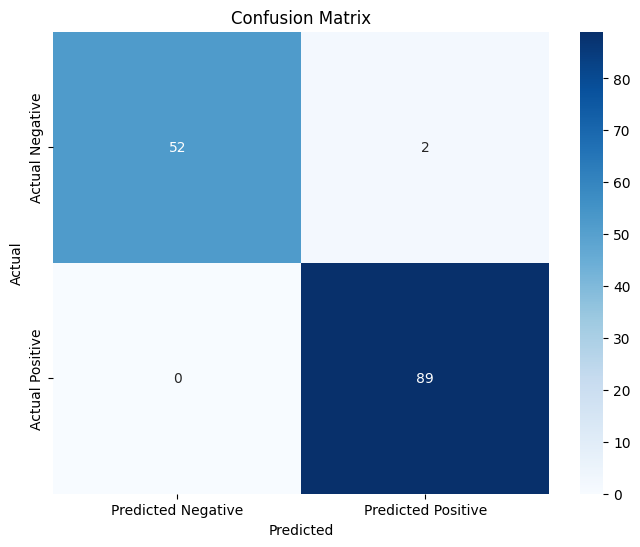

In [11]:
#Create confusion matrix
confusion_matrix=confusion_matrix(dependent_test,predicted_dependent)

#Print confusion matrix
print("Simple Confusion Matrix:")
print(confusion_matrix)

#Create a heatmap to visualize the confusion matrix better
print("Heatmap version of confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [12]:
#Calculate accuracy
accuracy= accuracy_score(dependent_test,predicted_dependent)
print('Accuracy:',accuracy)

#Calculate precision
precision = precision_score(dependent_test, predicted_dependent)
print('Precision:', precision)

#Calculate recall
recall = recall_score(dependent_test, predicted_dependent)
print('Recall:', recall)

#Calculate F1 score
f1 = f1_score(dependent_test, predicted_dependent)
print('F1 Score:', f1)

print("")

#Print the classification report
print("Classification report")
classification_Report= classification_report(dependent_test,predicted_dependent)
print(classification_Report)

Accuracy: 0.986013986013986
Precision: 0.978021978021978
Recall: 1.0
F1 Score: 0.9888888888888889

Classification report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.98      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143

